# Generating Models
This notebook demonstrates how to generate a model from a compact, string representation of the transcription factors for a gene.

In [1]:
%matplotlib inline
import tellurium as te
import gene_network as gn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Using Model Maker

In [2]:
# Create the reaction (including kinetics) for gene7
gene7 = gn.GeneReaction(7)
print(gene7)

J7: => mRNA7; L7 - d_mRNA7*mRNA7


In [3]:
result = gn.GeneReaction.do("7+4")
result.reaction

'J7: => mRNA7; L7 - d_mRNA7*mRNA7 + Vm7 * ( 1 ) / ( 1 + K1_7*P4^H7 )'

In [4]:
result.constants

['L7', 'd_mRNA7', 'K1_7', 'Vm7', 'H7']

In [5]:
result = gn.GeneReaction.do("7+4A-1")
result.reaction

'J7: => mRNA7; L7 - d_mRNA7*mRNA7 + Vm7 * ( K1_7*P4^H7 ) / ( 1 + K1_7*P4^H7 + K2_7*P1^H7 + K3_7*P4^H7*P1^H7 )'

## Generate the reactions in the initial network

The text description of the network is:

``
1+0O+4
2+4
3+6
4-2
6+7A-1
8-1
``

In [6]:
# Print the variable part of the model, both reactions and constants.
descriptions = ["1+0O+4", "2+4", "3+6", "4-2", 5, "6+7A-1", 7, "8-1"]
mrna_reactions = ""
constants_initializations = ""
for stg in descriptions:
    result = gn.GeneReaction.do(stg)
    mrna_reactions += "%s\n" % result.reaction
    # constants_initializations +=  "%s\n" % result.constants
    for constant in result.constants:
        if (not "d_mRNA" in constant) and (not "L" in constant):
            constants_initializations += "%s = 0;\n" % constant
print(mrna_reactions)
print(constants_initializations)
    

J1: => mRNA1; L1 - d_mRNA1*mRNA1 + Vm1 * ( K1_1*INPUT^H1+ K2_1*P4^H1+ K3_1*INPUT^H1*P4^H1 ) / ( 1 + K1_1*INPUT^H1 + K2_1*P4^H1 + K3_1*INPUT^H1*P4^H1 )
J2: => mRNA2; L2 - d_mRNA2*mRNA2 + Vm2 * ( 1 ) / ( 1 + K1_2*P4^H2 )
J3: => mRNA3; L3 - d_mRNA3*mRNA3 + Vm3 * ( 1 ) / ( 1 + K1_3*P6^H3 )
J4: => mRNA4; L4 - d_mRNA4*mRNA4 + Vm4 * ( 1 ) / ( 1 + K1_4*P2^H4 )
J5: => mRNA5; L5 - d_mRNA5*mRNA5
J6: => mRNA6; L6 - d_mRNA6*mRNA6 + Vm6 * ( K1_6*P7^H6 ) / ( 1 + K1_6*P7^H6 + K2_6*P1^H6 + K3_6*P7^H6*P1^H6 )
J7: => mRNA7; L7 - d_mRNA7*mRNA7
J8: => mRNA8; L8 - d_mRNA8*mRNA8 + Vm8 * ( 1 ) / ( 1 + K1_8*P1^H8 )

K1_1 = 0;
K2_1 = 0;
K3_1 = 0;
Vm1 = 0;
H1 = 0;
K1_2 = 0;
Vm2 = 0;
H2 = 0;
K1_3 = 0;
Vm3 = 0;
H3 = 0;
K1_4 = 0;
Vm4 = 0;
H4 = 0;
K1_6 = 0;
K2_6 = 0;
K3_6 = 0;
Vm6 = 0;
H6 = 0;
K1_8 = 0;
Vm8 = 0;
H8 = 0;



Now compare the printed reactions with the initial model.

### Initial model

``
J1:  => mRNA1; L1 + Vm1*((K1_1*INPUT^H1 + K2_1*P4^H1 + K1_1*K3_1*INPUT^H1*P4^H1)/(1 + K1_1*INPUT^H1 + K2_1*P4^H1 + K1_1*K3_1*INPUT^H1*P4^H1)) - d    _mRNA1*mRNA1;
J2:  => mRNA2; L2 + Vm2*(K1_2*P4^H2/(1 + K1_2*P4^H2)) - d_mRNA2*mRNA2;
J3:  => mRNA3; L3 + Vm3*(K1_3*P6^H3/(1 + K1_3*P6^H3)) - d_mRNA3*mRNA3;
J4:  => mRNA4; L4 + Vm4*(1/(1 + K1_4*P2^H4)) - d_mRNA4*mRNA4;
J5:  => mRNA5; L5 - d_mRNA5*mRNA5;
J6:  => mRNA6; L6 + Vm6*(K1_6*P7^H6/(1 + K1_6*P7^H6 + K2_6*P1^H6 + K1_6*K2_6*P7^H6*P1^H6)) - d_mRNA6*mRNA6;
J7:  => mRNA7; L7 - d_mRNA7*mRNA7;
J8:  => mRNA8; L8 + Vm8*(1/(1 + K1_8*P1^H8)) - d_mRNA8*mRNA8;
``


## Creating and Using a Generated Model
1. Usage example. Access model and parameters.
1. Running simulations with plots
1. Compare with initial model

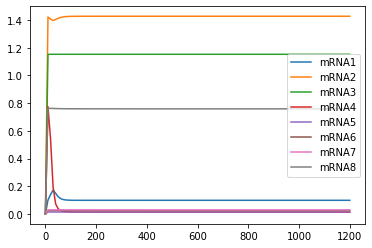

In [8]:
base_network = gn.GeneNetwork()
base_network.generate()
rr = te.loada(base_network.model)
data = rr.simulate(0, 1200, 120)
df_data = pd.DataFrame(data)
df_data.columns = [s[1:-1] for s in data.colnames]
df_data['time'] = df_data['im']
df_data = df_data.set_index('time')
del df_data['INPUT']
del df_data['im']
for col in df_data.columns:
    if "P" in col:
        del df_data[col]
plt.plot(df_data.index, df_data)
plt.legend(df_data.columns)

In [ ]:
print(base_network.model)

In [ ]:
print( gn.INITIAL_NETWORK)

In [ ]:
descriptor = gn.GeneDescriptor.parse('6+7P-1')
gn.GeneReaction(descriptor)


In [ ]:
base_network._uninitialize_constants

## Manual Exploratory Analysis

## Programmatic Exploration